In [2]:
#Importing necessary dependencies and libraries
# We use Kears backend for the CNN
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
from tensorflow.keras import datasets
from keras.utils.np_utils import to_categorical
from keras_preprocessing import image

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten,MaxPooling2D,Conv2D
from keras.utils import np_utils
from keras_preprocessing.image import  ImageDataGenerator, load_img

In [4]:
import numpy as np
import pandas as pd
import cv2

In [5]:
!pip install split_folders
import splitfolders

In [6]:
!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

--2021-04-10 18:41:20--  https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pan6mutc5xj5kj0/trainPart1.zip [following]
--2021-04-10 18:41:20--  https://www.dropbox.com/s/raw/pan6mutc5xj5kj0/trainPart1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd612426769335589d45c9f4a51.dl.dropboxusercontent.com/cd/0/inline/BMWc_Kn-JAeEF0VcP2iQM9tInuJoDLYB4njzh5jufl8WZTPZYZ-zyeVyLrOqk4wGLoLOOnKHLc8422hnWQILjwHHC-yR4kGKokaS4uHD8XiYPeFerOM_hJsHRfH0nwxDXoOwNvyp3WZBxvmSfz1CHE0P/file# [following]
--2021-04-10 18:41:20--  https://ucd612426769335589d45c9f4a51.dl.dropboxusercontent.com/cd/0/inline/BMWc_Kn-JAeEF0VcP2iQM9tInuJoDLYB4njzh5jufl8WZTPZYZ-zyeVyLrOqk4wGLoLOOnKHLc8422hnWQIL

In [7]:
!unzip trainPart1.zip

Archive:  trainPart1.zip
   creating: train/
   creating: train/Sample002/
  inflating: train/Sample002/img002-048.png  
  inflating: train/Sample002/img002-050.png  
  inflating: train/Sample002/img002-006.png  
  inflating: train/Sample002/img002-004.png  
  inflating: train/Sample002/img002-053.png  
  inflating: train/Sample002/img002-045.png  
  inflating: train/Sample002/img002-052.png  
  inflating: train/Sample002/img002-047.png  
  inflating: train/Sample002/img002-020.png  
  inflating: train/Sample002/img002-009.png  
  inflating: train/Sample002/img002-011.png  
  inflating: train/Sample002/img002-013.png  
  inflating: train/Sample002/img002-034.png  
  inflating: train/Sample002/img002-038.png  
  inflating: train/Sample002/img002-024.png  
  inflating: train/Sample002/img002-025.png  
  inflating: train/Sample002/img002-018.png  
  inflating: train/Sample002/img002-032.png  
  inflating: train/Sample002/img002-028.png  
  inflating: train/Sample002/img002-001.png  
  inf

<function matplotlib.pyplot.show>

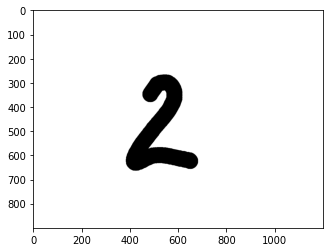

In [8]:
#Read a random image from the training dataset and output its vital infos
img = mpimg.imread('/content/train/Sample003/img003-030.png')
imgplot = plt.imshow(img)
plt.show

In [9]:
#Getting an idea about the image characteristics before Pre-Processing:
print(type(img))  
print(img.shape)  
type(img.shape)   

<class 'numpy.ndarray'>
(900, 1200, 3)


tuple

In [10]:
input_folder = "/content/train"
output = "/content/valid"
#We now split the input_folder into three parts: TEST, TRAIN, VAL each containing 80%, 10%, 10% of the input dataset respectively
splitfolders.ratio(input_folder , output , seed = 500 , ratio = (0.8,0.1,0.1))

Copying files: 2480 files [00:00, 6514.18 files/s]


In [11]:
#Predefining input image size as the 400*400 grid contains the most important pixels in the image, rest are background pixels
img_height , img_width  = 400, 400
train_dir = r"/content/valid/train"
test_dir = r"/content/valid/test"
valid_dir = r"/content/valid/val"

In [12]:
import os
List = []
path = '/content/valid'
for root, dirs,files in os.walk('/content/train'):
   for name in dirs:
      List.append(os.path.join(root, name))

In [13]:
List

['/content/train/Sample062',
 '/content/train/Sample054',
 '/content/train/Sample002',
 '/content/train/Sample015',
 '/content/train/Sample030',
 '/content/train/Sample055',
 '/content/train/Sample008',
 '/content/train/Sample046',
 '/content/train/Sample041',
 '/content/train/Sample042',
 '/content/train/Sample035',
 '/content/train/Sample021',
 '/content/train/Sample059',
 '/content/train/Sample061',
 '/content/train/Sample052',
 '/content/train/Sample057',
 '/content/train/Sample020',
 '/content/train/Sample053',
 '/content/train/Sample018',
 '/content/train/Sample003',
 '/content/train/Sample040',
 '/content/train/Sample032',
 '/content/train/Sample010',
 '/content/train/Sample019',
 '/content/train/Sample034',
 '/content/train/Sample009',
 '/content/train/Sample043',
 '/content/train/Sample031',
 '/content/train/Sample005',
 '/content/train/Sample012',
 '/content/train/Sample013',
 '/content/train/Sample023',
 '/content/train/Sample029',
 '/content/train/Sample036',
 '/content/tra

In [14]:
List_new=[]
for i in List: 
    List_new.append(i.replace('/content/train/',''))
sorted_list = sorted(List_new)

In [15]:
sorted_list  #sorted_list now contains aplhabetically sorted training values

['Sample001',
 'Sample002',
 'Sample003',
 'Sample004',
 'Sample005',
 'Sample006',
 'Sample007',
 'Sample008',
 'Sample009',
 'Sample010',
 'Sample011',
 'Sample012',
 'Sample013',
 'Sample014',
 'Sample015',
 'Sample016',
 'Sample017',
 'Sample018',
 'Sample019',
 'Sample020',
 'Sample021',
 'Sample022',
 'Sample023',
 'Sample024',
 'Sample025',
 'Sample026',
 'Sample027',
 'Sample028',
 'Sample029',
 'Sample030',
 'Sample031',
 'Sample032',
 'Sample033',
 'Sample034',
 'Sample035',
 'Sample036',
 'Sample037',
 'Sample038',
 'Sample039',
 'Sample040',
 'Sample041',
 'Sample042',
 'Sample043',
 'Sample044',
 'Sample045',
 'Sample046',
 'Sample047',
 'Sample048',
 'Sample049',
 'Sample050',
 'Sample051',
 'Sample052',
 'Sample053',
 'Sample054',
 'Sample055',
 'Sample056',
 'Sample057',
 'Sample058',
 'Sample059',
 'Sample060',
 'Sample061',
 'Sample062']

In [16]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), batch_size= 16 , class_mode = 'categorical') #Training dat generator 
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) , batch_size = 16,  class_mode = 'categorical' ) #Testing data generator

Found 1984 images belonging to 62 classes.
Found 248 images belonging to 62 classes.


In [18]:
validation_generator.classes

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29,
       29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
       34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38,
       38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42,
       42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46,
       46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54, 55,
       55, 55, 55, 56, 56

In [19]:
train_generator.classes

array([ 0,  0,  0, ..., 61, 61, 61], dtype=int32)

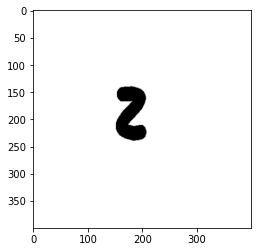

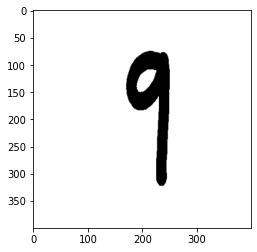

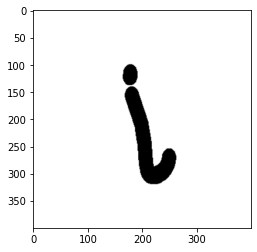

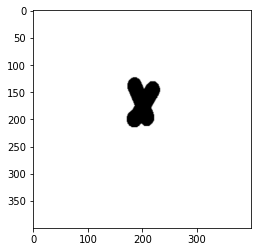

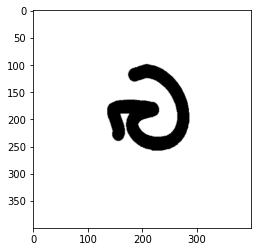

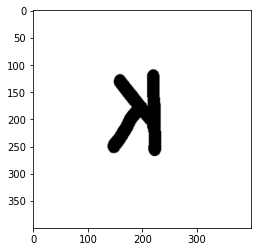

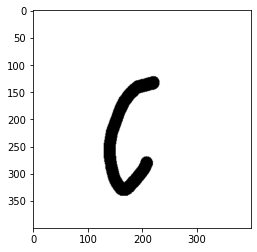

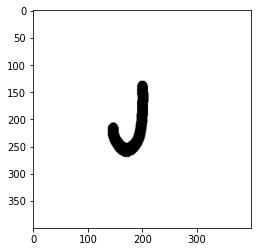

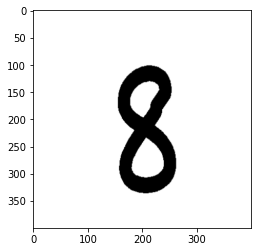

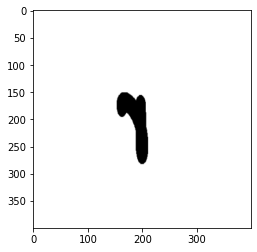

In [20]:
for i in range(0,10):
     for X_batch , Y_batch in train_generator:
         image = X_batch[0]
         plt.imshow(image)
         break
     plt.show()    

**Layers in CNN:**
    
    Convolution Layer
    ReLu Layer
    Pooling Layer
    Fully Connected Layer called Dense

In [21]:
#Building the CNN model with keras backend
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size



model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_1 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 16)        4

In [22]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) #Multiclass Classification => categorical_crossentropy loss function
                                                                                            # rmsprop prevents gradient from either vanishing or exploding
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_1 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 16)        4

In [24]:
training = model.fit(train_generator, steps_per_epoch= 14, epochs = 11 , validation_data = validation_generator, batch_size = 16)

Epoch 1/11
14/14 [==============================] - 13s 921ms/step - loss: 4.6491 - accuracy: 0.9839 - val_loss: 4.1069 - val_accuracy: 0.9839
Epoch 2/11
14/14 [==============================] - 12s 898ms/step - loss: 4.0477 - accuracy: 0.9839 - val_loss: 7.0528 - val_accuracy: 0.9839
Epoch 3/11
14/14 [==============================] - 12s 894ms/step - loss: 4.2472 - accuracy: 0.9839 - val_loss: 4.2217 - val_accuracy: 0.9839
Epoch 4/11
14/14 [==============================] - 12s 905ms/step - loss: 3.8824 - accuracy: 0.9839 - val_loss: 3.8713 - val_accuracy: 0.9839
Epoch 5/11
14/14 [==============================] - 12s 895ms/step - loss: 3.6741 - accuracy: 0.9839 - val_loss: 3.6109 - val_accuracy: 0.9839
Epoch 6/11
14/14 [==============================] - 12s 894ms/step - loss: 3.5255 - accuracy: 0.9837 - val_loss: 3.4907 - val_accuracy: 0.9840
Epoch 7/11
14/14 [==============================] - 12s 904ms/step - loss: 3.3255 - accuracy: 0.9840 - val_loss: 3.3560 - val_accuracy: 0.9843

In [25]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


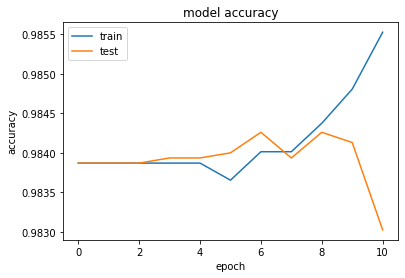

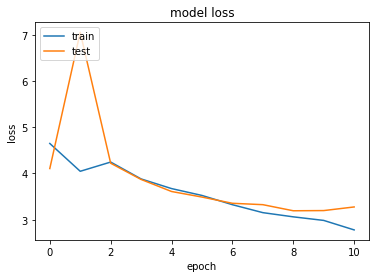

In [26]:
#Loss and Accuracy Plots:
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

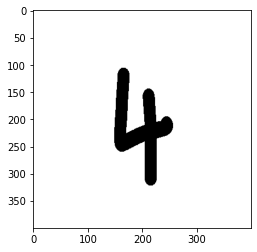

Sample021
1.0


In [28]:
#Read a random image from TEST Dataset and output its prediction accuracy:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/valid/test/Sample005/img005-044.png",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,62):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = sorted_list[k]
prob = val[0][k]
print(preds)
print(prob)

In [29]:
val

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [30]:
val.shape

(1, 62)

**Part 2:**

In [31]:
!unzip MNIST.zip
mnist =  "/content/MNIST"

Archive:  MNIST.zip
   creating: MNIST/Sample001/
  inflating: MNIST/Sample001/img001-001.png  
  inflating: MNIST/Sample001/img001-002.png  
  inflating: MNIST/Sample001/img001-003.png  
  inflating: MNIST/Sample001/img001-004.png  
  inflating: MNIST/Sample001/img001-007.png  
  inflating: MNIST/Sample001/img001-008.png  
  inflating: MNIST/Sample001/img001-009.png  
  inflating: MNIST/Sample001/img001-010.png  
  inflating: MNIST/Sample001/img001-011.png  
  inflating: MNIST/Sample001/img001-012.png  
  inflating: MNIST/Sample001/img001-013.png  
  inflating: MNIST/Sample001/img001-014.png  
  inflating: MNIST/Sample001/img001-016.png  
  inflating: MNIST/Sample001/img001-017.png  
  inflating: MNIST/Sample001/img001-018.png  
  inflating: MNIST/Sample001/img001-019.png  
  inflating: MNIST/Sample001/img001-021.png  
  inflating: MNIST/Sample001/img001-024.png  
  inflating: MNIST/Sample001/img001-025.png  
  inflating: MNIST/Sample001/img001-026.png  
  inflating: MNIST/Sample001/i

In [32]:
#Read a random image from the training dataset and output its vital infos
im = cv2.imread('/content/MNIST/Sample003/img003-030.png')
print(type(im))   #printing "type" of item of dataset
print(im.shape)  #printing shape of item of dataset
type(im.shape) 

<class 'numpy.ndarray'>
(900, 1200, 3)


tuple

In [45]:
#We now split the input_folder into three parts: TEST, TRAIN, VAL each containing 80%, 10%, 10% of the input dataset respectively
input_folder = "/content/MNIST"
output = "/content/MNISTpro" 
splitfolders.ratio(input_folder , output , seed = 1337 , ratio = (.8,.1,.1))

Copying files: 400 files [00:00, 8348.99 files/s]


In [46]:
S = sorted_list[0:10] #sorted_list now contains aplhabetically sorted training values

In [47]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [48]:
train_dir = r"/content/MNISTpro/train"
test_dir = r"/content/MNISTpro/test"
valid_dir = r"/content/MNISTpro/val"

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), batch_size= 8 , class_mode = 'categorical') #Training dat generator 
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) , batch_size = 8,  class_mode = 'categorical' ) #Testing data generator

Found 320 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [50]:
#Building the CNN model with keras backend
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size


model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
activation_5 (Activation)    (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_6 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 16)       

In [51]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) #Multiclass Classification => categorical_crossentropy loss function
                                                                                            # rmsprop prevents gradient from either vanishing or exploding
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
activation_5 (Activation)    (None, 398, 398, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 197, 197, 32)      18464     
_________________________________________________________________
activation_6 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 16)       

In [53]:
training = model.fit(train_generator, steps_per_epoch= 14, epochs = 10 , 
                               validation_data = validation_generator, batch_size = 8)

Epoch 1/10
14/14 [==============================] - 6s 375ms/step - loss: 3.1271 - accuracy: 0.8982 - val_loss: 2.2802 - val_accuracy: 0.9000
Epoch 2/10
14/14 [==============================] - 5s 379ms/step - loss: 2.2897 - accuracy: 0.8964 - val_loss: 2.1954 - val_accuracy: 0.9000
Epoch 3/10
14/14 [==============================] - 5s 375ms/step - loss: 2.1353 - accuracy: 0.9000 - val_loss: 2.3056 - val_accuracy: 0.8850
Epoch 4/10
14/14 [==============================] - 5s 375ms/step - loss: 1.9608 - accuracy: 0.9027 - val_loss: 1.9199 - val_accuracy: 0.9000
Epoch 5/10
14/14 [==============================] - 5s 386ms/step - loss: 1.7560 - accuracy: 0.9054 - val_loss: 1.7550 - val_accuracy: 0.9075
Epoch 6/10
14/14 [==============================] - 5s 380ms/step - loss: 1.4953 - accuracy: 0.9214 - val_loss: 2.1709 - val_accuracy: 0.8825
Epoch 7/10
14/14 [==============================] - 5s 377ms/step - loss: 1.4786 - accuracy: 0.9161 - val_loss: 1.6211 - val_accuracy: 0.9125
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


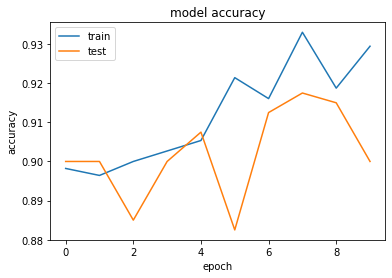

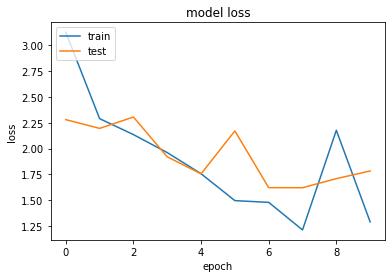

In [54]:
#Loss and Accuracy Plots:
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

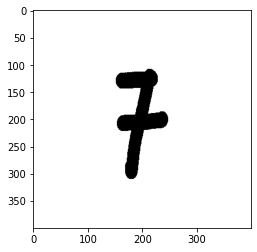

Sample008
1.0


In [56]:
#Read a random image from TEST Dataset and output its prediction accuracy:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/MNISTpro/test/Sample008/img008-031.png",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,10):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = S[k]
prob = val[0][k]
print(preds)
print(prob)

**Part 3:**

In [57]:
!wget https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip

--2021-04-10 18:56:18--  https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/otc12z2w7f7xm8z/mnistTask3.zip [following]
--2021-04-10 18:56:18--  https://www.dropbox.com/s/raw/otc12z2w7f7xm8z/mnistTask3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccacdc2c32c4806304fc11d3e8c.dl.dropboxusercontent.com/cd/0/inline/BMX7NfkArIb2IvssViX5nanopeS1G22VrXiUYtP5WCP8jB1bP6zS80qCaAHix20KzhRo0S5XgrFv-1IBwNgRkfzq1moShJ_HE434R8mGAxW0dWUEoAvlcuJ8spMh6UBkgTj-yeS6n2gM5PLjTWvcJs2M/file# [following]
--2021-04-10 18:56:19--  https://uccacdc2c32c4806304fc11d3e8c.dl.dropboxusercontent.com/cd/0/inline/BMX7NfkArIb2IvssViX5nanopeS1G22VrXiUYtP5WCP8jB1bP6zS80qCaAHix20KzhRo0S5XgrFv-1IBwNgR

In [58]:
!unzip mnistTask3.zip

Streaming output truncated to the last 5000 lines.
 extracting: mnistTask/3/image_021488.jpg  
 extracting: mnistTask/3/image_047540.jpg  
 extracting: mnistTask/3/image_050475.jpg  
 extracting: mnistTask/3/image_024391.jpg  
 extracting: mnistTask/3/image_020193.jpg  
 extracting: mnistTask/3/image_004447.jpg  
 extracting: mnistTask/3/image_051601.jpg  
 extracting: mnistTask/3/image_009900.jpg  
 extracting: mnistTask/3/image_020916.jpg  
 extracting: mnistTask/3/image_025962.jpg  
 extracting: mnistTask/3/image_054889.jpg  
 extracting: mnistTask/3/image_012369.jpg  
 extracting: mnistTask/3/image_025528.jpg  
 extracting: mnistTask/3/image_035609.jpg  
 extracting: mnistTask/3/image_037469.jpg  
 extracting: mnistTask/3/image_057560.jpg  
 extracting: mnistTask/3/image_000119.jpg  
 extracting: mnistTask/3/image_020120.jpg  
 extracting: mnistTask/3/image_044129.jpg  
 extracting: mnistTask/3/image_027779.jpg  
 extracting: mnistTask/3/image_058235.jpg  
 extracting: mnistTask/3/

In [59]:
#Getting an idea about the image characteristics before Pre-Processing:
im2 = cv2.imread('/content/mnistTask/2/image_000310.jpg')
print(type(im2))  
print(im2.shape)  
print(type(im2.shape))  

<class 'numpy.ndarray'>
(28, 28, 3)
<class 'tuple'>


In [60]:
#We now split the input_folder into three parts: TEST, TRAIN, VAL each containing 80%, 10%, 10% of the input dataset respectively
input_folder = "/content/mnistTask"
output = "/content/P3" 
splitfolders.ratio(input_folder , output , seed = 1337 , ratio = (.8,.1,.1))

Copying files: 60000 files [00:07, 8122.96 files/s]


In [62]:
#Predefining input image size as the 28*28 grid contains the most important pixels in the image, rest are background pixels
img_width, img_height = 28,28

In [64]:
List3=[]
for k in range(0,10):
    List3.append(k) 

In [65]:
List3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [66]:
import keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

In [67]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), batch_size= 64 , class_mode = 'categorical')  #Training dat generator 
validation_generator = test_datagen.flow_from_directory(valid_dir , target_size = (img_width , img_height) , batch_size = 64,  class_mode = 'categorical') #Testing data generator  

Found 320 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [68]:
#Building the CNN model with keras backend
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))   #Convolution layer with 64 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu layer
model.add(MaxPooling2D(pool_size=(2,2)))                #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(32, (3, 3)))                           #Convolution layer with 32 neurons and 3*3 filter 
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size

model.add(Conv2D(16, (3, 3)))                           #Convolution layer with 16 neurons and 3*3 filter
model.add(Activation('relu'))                           #ReLu Layer
model.add(MaxPooling2D(pool_size=(2, 2)))               #Used to reduce the size(downsample) of pixel matrix , (2,2) is stride size



model.add(Flatten())                                    #To convert pixel matrix into 1D array
model.add(Activation('relu'))                           #ReLu Layer
model.add(Dropout(0.2))                                 #To prevent overfitting
model.add(Dense(1))                                     #Adds fully connected layer to neural network
model.add(Activation('softmax'))                        #softmax function is used as activation function for multiclass classification
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 16)         

In [69]:
model.compile(optimizer="rmsprop",loss= "categorical_crossentropy" , metrics = ['accuracy']) #Multiclass Classification => categorical_crossentropy loss function
 # rmsprop prevents gradient from either vanishing or exploding
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 16)         

In [76]:
training = model.fit(train_generator, steps_per_epoch= 5, epochs = 10 , validation_data = validation_generator,  batch_size = 2) 
#Low data: hence epoch_steps and batch_size are reduced considerably.

Epoch 1/10
5/5 [==============================] - 4s 885ms/step - loss: 2.2981 - accuracy: 0.9000 - val_loss: 2.2888 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 4s 780ms/step - loss: 2.2911 - accuracy: 0.9000 - val_loss: 2.2807 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 4s 777ms/step - loss: 2.2821 - accuracy: 0.9000 - val_loss: 2.2683 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 4s 775ms/step - loss: 2.2687 - accuracy: 0.9000 - val_loss: 2.2608 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 4s 781ms/step - loss: 2.2470 - accuracy: 0.9000 - val_loss: 2.2774 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 4s 783ms/step - loss: 2.2461 - accuracy: 0.9000 - val_loss: 2.2185 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 4s 777ms/step - loss: 2.2148 - accuracy: 0.9000 - val_loss: 2.2751 - val_accuracy: 0.9000
Epoch 8/10
5/5 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


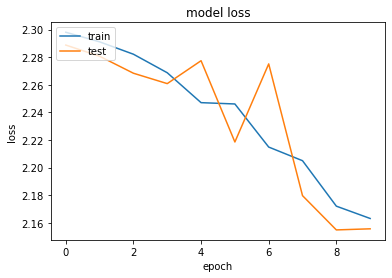

In [77]:
#Loss and Accuracy Plots:
print(training.history.keys())
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

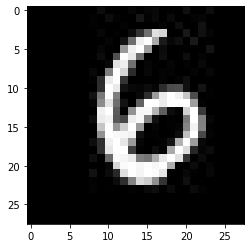

5
1.0


In [79]:
#Read a random image from TEST Dataset and output its prediction accuracy:
from keras.preprocessing.image import img_to_array, load_img
img = load_img("/content/P3/test/2/image_000218.jpg",target_size=input_shape)
plt.imshow(img)
plt.show()
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
r = np.vstack([X])
val = model.predict(r)
a = 0
c = 0
for i in range(0,10):
    if val[0][i] > a :
        a = val[0][i]
        k = c
    else:
        c = c+1
preds = List3[k]
prob = val[0][k]
print(preds)
print(prob)